# Project name: Computer vision and natural language processing with Deep learning Algorithms
***Contributer: Rajeev singh sisodiya***

Introduction to Deep Learning

Deep Learning is a subset of Machine Learning. Deep Learning is mostly about Neural Network. The main aim of Deep Learning or Neural Network is to mimic the human Brain. Means, It makes the machine learn like human being learn.

Why Deep Learning?

Computers have long had techniques for recognizing features inside of images. The results weren’t always great. Computer vision has been a main beneficiary of deep learning. Computer vision using deep learning now rivals humans on many image recognition tasks.

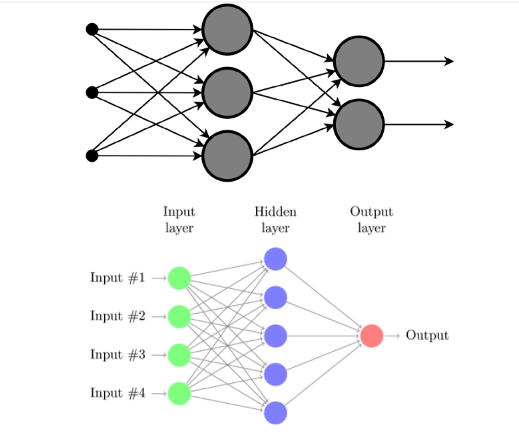

In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf

In [3]:
tf.version

<module 'tensorflow._api.v2.version' from '/opt/conda/lib/python3.10/site-packages/tensorflow/_api/v2/version/__init__.py'>

In [4]:
print(f"Tensorflow Version: {tf.__version__}")

Tensorflow Version: 2.12.0


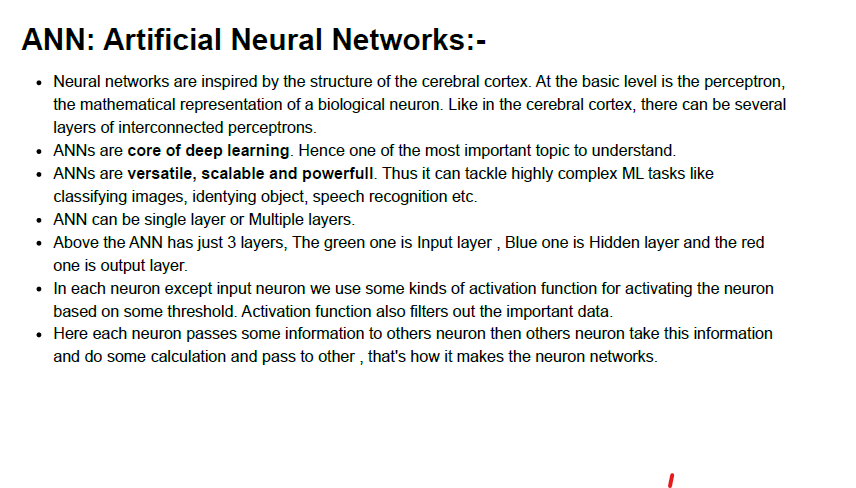

In [5]:
tf.config.list_physical_devices('GPU')
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

Deep Learning classification: -


(1) ANN --> Artificial Neural Network. This ANN works on all kinds of Tabular dataset (excel sheet data).
Any kinds of Regression & Classification task of Machine Learning can be solved by ANN.


(2) CNN --> Convolutional Neural Network. CNN works on computer vision like Images, Videos. CNN
architecture works well on these kinds of Image & videos data. Some application of CNN are:-

(a) Image Classification --> CNN, Transfer Learning

(b) Object Detection --> RCNN, FAST RCNN, FASTER RCNN, SSD, YOLO, DETECTRON

(c) Segmentation

(d) Tracking

(e) GAN >> Generative Adversarial Network

(3) RNN --> Recurrent Neural Network. RNN works whenever input data are text, time series or sequential data like Audio, Time series et cetra. Some techniques are used in RNN:-

RNN

LSTM RNN

Bidirectional LSTM RNN

Encoder, Decoder

Transformers

Bert

GPT1, GPT2, GPT3

NLP - Natural Language Processing is the part of RNN.

NLP --> Text --> Vector

Bag of words (BOW)

TFIDF

word2vec

word embeddingA

In [6]:
CheckList = ["GPU", "CPU"]
for device in CheckList:
  out_ = tf.config.list_physical_devices(device)
if len(out_) > 0:
  print(f"{device} is available")
  print("details\n",out_)
else:
  print(f"{device} not available")

CPU is available
details
 [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


**The Perceptron**

Its the simplest ANN architecture. It was invented by Frank Rosenblatt in 1957 Its known as threshold logic unit(TLU) or linear threshold unit (LTU). Here inputs are not just binary. Lets see the architecture shown below -

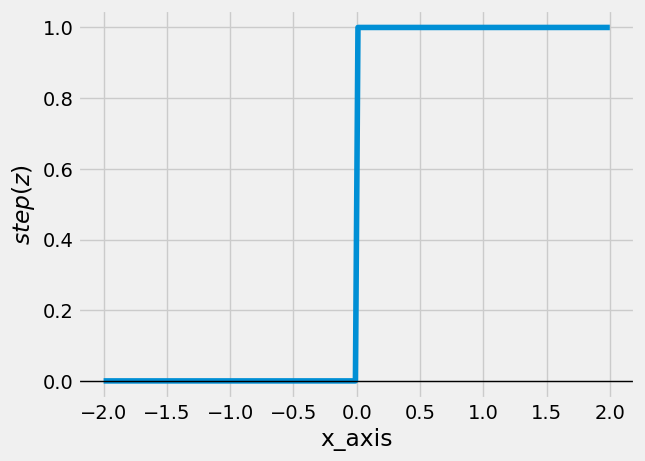

In [7]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
x_axis = np.linspace(-2,2,200)
step = np.where(x_axis < 0, 0, 1)
plt.plot(x_axis, step)
plt.xlabel("x_axis")
plt.ylabel(r"$step(z)$")
plt.axhline(0, color='k', lw=1);

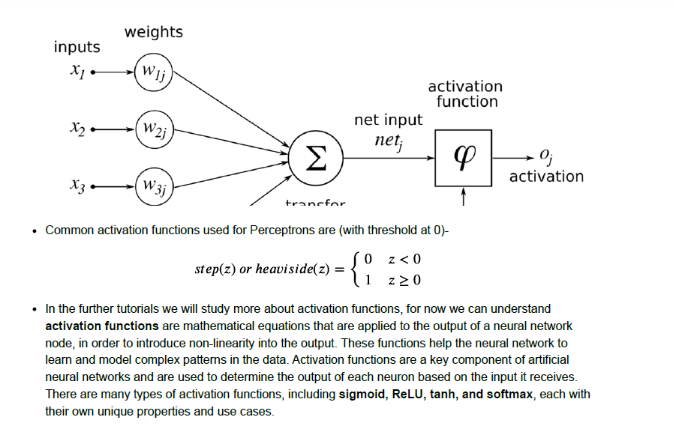

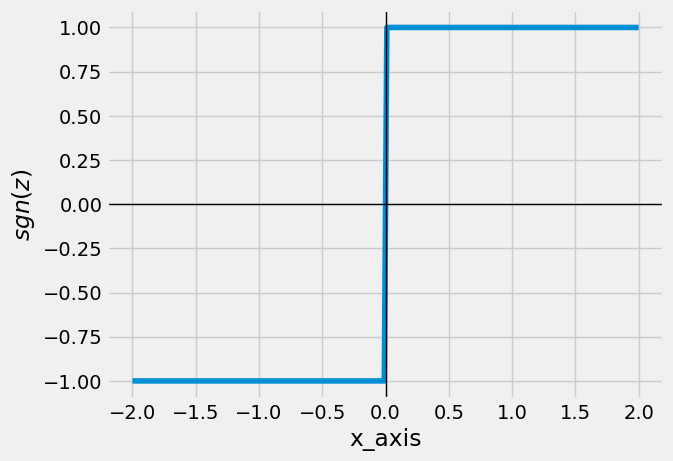

In [8]:
def sgn(x):
  if x < 0:
    return -1
  elif x > 0:
    return 1
    return 0
sgn = np.array(list(map(sgn, x_axis)))
plt.plot(x_axis, sgn)
plt.xlabel("x_axis")
plt.ylabel(r"$sgn(z)$")
plt.axhline(0, color='k', lw=1);
plt.axvline(0, color='k', lw=1);

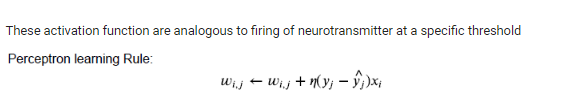

Single TLUs (Threshold Logic Unit) are simple linear binary classifier hence not suitable for non linear operation. Rosenblatt proved that if the data is linearly separable then only this algorithm will converge which is known as Perceptron learning theorem

Derivation:- Let's assume that you are doing a binary classification with class +1 and -1 Let there be decision function which takes linear combination of certain inputs " " corresponding weights " " and net input 𝜙(𝑧)

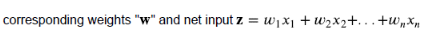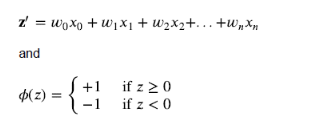

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
import pandas as pd
plt.style.use("fivethirtyeight")

Implementation of Perceptron with Python

In [10]:
class Perceptron:
  def __init__(self, eta, epochs):
    self.weights = np.random.randn(3) * 1e-4
    print(f"self.weights: {self.weights}")
    self.eta = eta
    self.epochs = epochs
def activationFunction(self, inputs, weights):
  z = np.dot(inputs, weights)
  return np.where(z > 0 , 1, 0)
def fit(self, X, y):
  self.X = X
  self.y = y
  X_with_bias = np.c_[self.X, -np.ones((len(self.X), 1))] # concactination
  print(f"X_with_bias: \n{X_with_bias}")
  for epoch in range(self.epochs):
    print(f"for epoch: {epoch}")
    y_hat = self.activationFunction(X_with_bias, self.weights)
    print(f"predicted value: \n{y_hat}")
    error = self.y - y_hat
    print(f"error: \n{error}")
    self.weights = self.weights + self.eta * np.dot(X_with_bias.T, error)
    print(f"updated weights: \n{self.weights}")
    print("#############\n")
def predict(self, X):
  X_with_bias = np.c_[X, -np.ones((len(self.X), 1))]
  return self.activationFunction(X_with_bias, self.weights)

AND Operation

In [11]:
data = {"x1": [0,0,1,1], "x2": [0,1,0,1], "y": [0,0,0,1]}
AND = pd.DataFrame(data)
AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [12]:
X = AND.drop("y", axis=1)
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [13]:
y = AND['y']
y.to_frame()

,y
0,0
1,0
2,0
3,1


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [15]:
model = Perceptron(eta = 0.5, epochs=10)

self.weights: [ 1.54193443e-04  1.16884309e-04 -3.51352014e-05]


Saving and Loading model

In [16]:
import os
# saving model
dir_ = "Perceptron_model"
os.makedirs(dir_, exist_ok=True)
filename = os.path.join(dir_, 'AND_model.model')
joblib.dump(model, filename)

['Perceptron_model/AND_model.model']

In [17]:
# load the model from drive
loaded_model = joblib.load(filename)

OR Operation

In [18]:
data = {"x1": [0,0,1,1], "x2": [0,1,0,1], "y": [0,1,1,1]}
OR = pd.DataFrame(data)
OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [19]:
X = OR.drop("y", axis=1)
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [20]:
y = OR['y']
y.to_frame()

,y
0,0
1,1
2,1
3,1


In [21]:
model = Perceptron(eta = 0.5, epochs=10)

self.weights: [9.51971903e-05 6.64444567e-06 2.77909840e-05]


XOR Operation

In [22]:
data = {"x1": [0,0,1,1], "x2": [0,1,0,1], "y": [0,1,1,0]}
XOR = pd.DataFrame(data)
XOR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [23]:
X = XOR.drop("y", axis=1) # axis = 1 >>> dropping across column
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [24]:
y = XOR['y']
y.to_frame()

,y
0,0
1,1
2,1
3,0


In [25]:
model = Perceptron(eta = 0.5, epochs=50)

self.weights: [-1.33643226e-05 -6.52938801e-05  2.22246144e-05]


Here we can see Perceptron can only classify the linear problem like AND, OR operation because they were linear problem. But in the case of XOR it couldn't classify correctly because it was a non-linear problem. Lets see graphically.

# **Analysis with the graph**

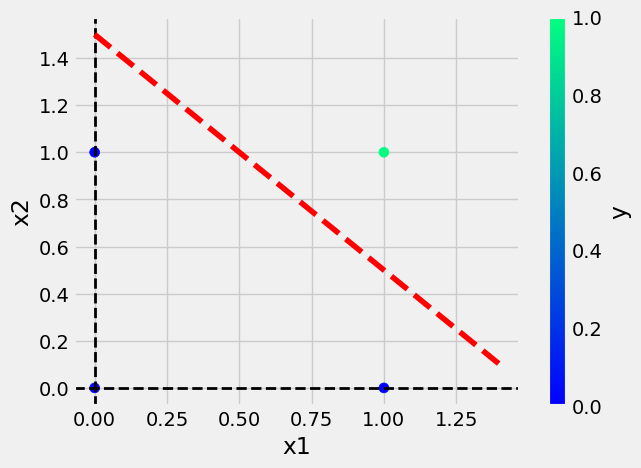

In [26]:
AND.plot(kind="scatter", x="x1", y="x2", c="y", s=50, cmap="winter")
plt.axhline(y=0, color="black", linestyle="--", linewidth=2)
plt.axvline(x=0, color="black", linestyle="--", linewidth=2)
x = np.linspace(0, 1.4) # >>> 50
y = 1.5 - 1*np.linspace(0, 1.4) # >>> 50
plt.plot(x, y, "r--")

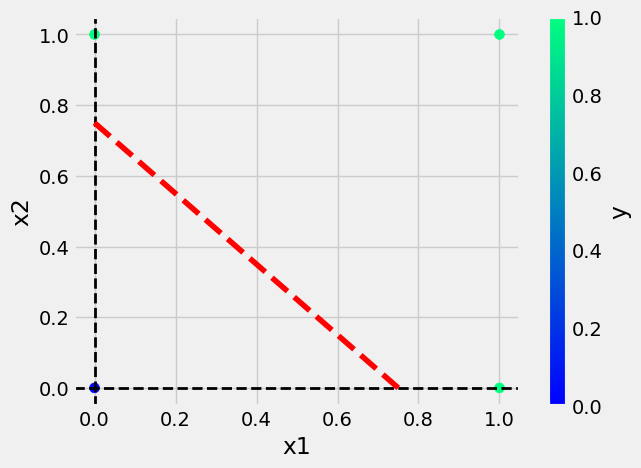

In [27]:
OR.plot(kind="scatter", x="x1", y="x2", c="y", s=50, cmap="winter")
plt.axhline(y = 0, color ="black", linestyle ="--", linewidth=2)
plt.axvline(x = 0, color ="black", linestyle ="--", linewidth=2)
plt.plot(np.linspace(0,0.75), 0.75 - 1*np.linspace(0,0.75), 'r--');

<Axes: xlabel='x1', ylabel='x2'>

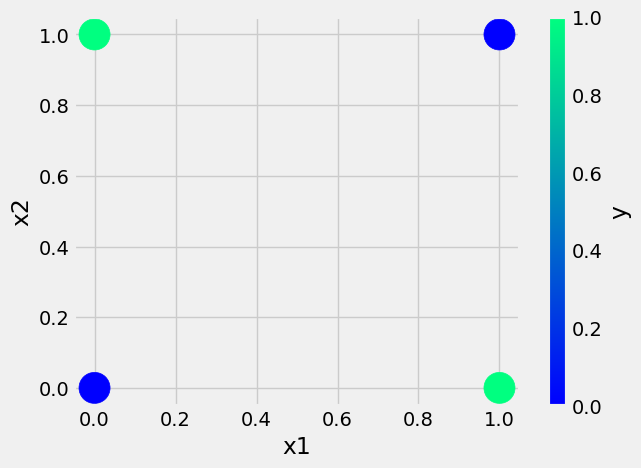

In [28]:
XOR.plot(kind="scatter", x="x1", y="x2", c="y", s=500, cmap="winter")

What is learning then?

forward pass + backward pass, we will learn more about this later

When does the prediction happen?

The prediction happens during the forward pass.

Drawbacks of Perceptron:- It cannot be used if the data is non linear.

Solution to this problem:- This can be solved by stacking the layers of perceptron, Also called as Multilayer Perceptron (MLP)

